In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

## Load Data from CSVs

* `sample_data` = metadata about samples used
* `taxon_data` = taxon classification, output from mothur

In [2]:
sample_data = pd.read_csv('sample_data.csv')

In [3]:
sample_data

,label,run_id,region,sample_details,depth,temp_c
0,01_dcm_SernOcean,ERR599104,Southern Ocean (near Antarctica),deep chlorophyll maximum layer,90 m,-0.781540
1,02_surface_SernOcean,ERR599090,Southern Ocean (near Antarctica),surface water layer,5 m,0.671080
2,03_meso_SPacific,ERR598999,South Pacific (near the Marquesas),mesopelagic zone,600 m,7.212238
3,04_surface_NAtlantic,ERR599078,North Atlantic (off the coast of Portugal),surface water layer,5 m,14.280650
4,05_dcm_SPacific,ERR598948,South Pacific (near the Marquesas),deep chlorophyll maximum layer,115 m,24.696250
5,06_surface_SPacific,ERR598992,South Pacific (near the Marquesas),surface water layer,5 m,26.544130


In [4]:
taxon_data = pd.read_csv('taxon_data.csv')

In [5]:
taxon_data.head(n=10)

,taxlevel,rankID,taxon,daughterlevels,total,01_dcm_SernOcean,02_surface_SernOcean,03_meso_SPacific,04_surface_NAtlantic,05_dcm_SPacific,06_surface_SPacific
0,2,0.1.1,Archaea_unclassified,1,289,3,0,138,61,33,54
1,2,0.1.2,Euryarchaeota,4,990,6,0,199,256,261,268
2,2,0.1.3,Thaumarchaeota,4,1391,1,0,1248,134,8,0
3,2,0.2.1,Acidobacteria,2,17,0,0,17,0,0,0
4,2,0.2.2,Actinobacteria,3,1587,2,2,434,339,385,425
5,2,0.2.3,Bacteria_unclassified,1,8372,1304,1119,1657,1596,1461,1235
6,2,0.2.4,Bacteroidetes,5,6167,1747,2086,417,911,256,750
7,2,0.2.5,Candidate_division_OD1,1,1,0,0,1,0,0,0
8,2,0.2.6,Candidate_division_TM7,1,16,0,0,12,0,3,1
9,2,0.2.7,Chlamydiae,1,7,0,0,2,0,1,4


## Rearrange Taxon Data

In [6]:
# Drop some columns
taxon_data_clean = taxon_data.drop(
    ['taxlevel','rankID', 'daughterlevels', 'total'],
    axis=1)

# Fixup index
taxon_data_clean = taxon_data_clean.set_index('taxon')
del taxon_data_clean.index.name

# Transpose rows and columns
taxon_data_clean = taxon_data_clean.transpose()
taxon_data_clean.index.name = "Sample"
taxon_data_clean.reset_index(inplace=True)

In [7]:
sample_data

,label,run_id,region,sample_details,depth,temp_c
0,01_dcm_SernOcean,ERR599104,Southern Ocean (near Antarctica),deep chlorophyll maximum layer,90 m,-0.781540
1,02_surface_SernOcean,ERR599090,Southern Ocean (near Antarctica),surface water layer,5 m,0.671080
2,03_meso_SPacific,ERR598999,South Pacific (near the Marquesas),mesopelagic zone,600 m,7.212238
3,04_surface_NAtlantic,ERR599078,North Atlantic (off the coast of Portugal),surface water layer,5 m,14.280650
4,05_dcm_SPacific,ERR598948,South Pacific (near the Marquesas),deep chlorophyll maximum layer,115 m,24.696250
5,06_surface_SPacific,ERR598992,South Pacific (near the Marquesas),surface water layer,5 m,26.544130


In [8]:
run_id = sample_data['run_id']
temp_c = sample_data['temp_c'].round(2).map(str)

label = run_id + "\n(" + temp_c + " °C)"

In [9]:
label

0    ERR599104\n(-0.78 °C)
1     ERR599090\n(0.67 °C)
2     ERR598999\n(7.21 °C)
3    ERR599078\n(14.28 °C)
4     ERR598948\n(24.7 °C)
5    ERR598992\n(26.54 °C)
dtype: object

In [10]:
taxon_data_clean.insert(0, "Label", label)

In [11]:
taxon_data_clean

,Label,Sample,Archaea_unclassified,Euryarchaeota,Thaumarchaeota,Acidobacteria,Actinobacteria,Bacteria_unclassified,Bacteroidetes,Candidate_division_OD1,...,Chloroflexi,Cyanobacteria,Deferribacteres,Firmicutes,Gemmatimonadetes,Lentisphaerae,Planctomycetes,Proteobacteria,Tenericutes,Verrucomicrobia
0,ERR599104\n(-0.78 °C),01_dcm_SernOcean,3,6,1,0,2,1304,1747,0,...,0,217,1,0,0,0,0,5451,0,0
1,ERR599090\n(0.67 °C),02_surface_SernOcean,0,0,0,0,2,1119,2086,0,...,0,247,0,0,0,0,0,5945,0,0
2,ERR598999\n(7.21 °C),03_meso_SPacific,138,199,1248,17,434,1657,417,1,...,74,272,331,2,59,4,39,4567,1,65
3,ERR599078\n(14.28 °C),04_surface_NAtlantic,61,256,134,0,339,1596,911,0,...,13,1053,230,3,1,1,6,4911,0,36
4,ERR598948\n(24.7 °C),05_dcm_SPacific,33,261,8,0,385,1461,256,0,...,78,778,358,1,7,1,37,5893,0,27
5,ERR598992\n(26.54 °C),06_surface_SPacific,54,268,0,0,425,1235,750,0,...,3,1431,375,0,0,0,23,5099,0,38


## Make Plot

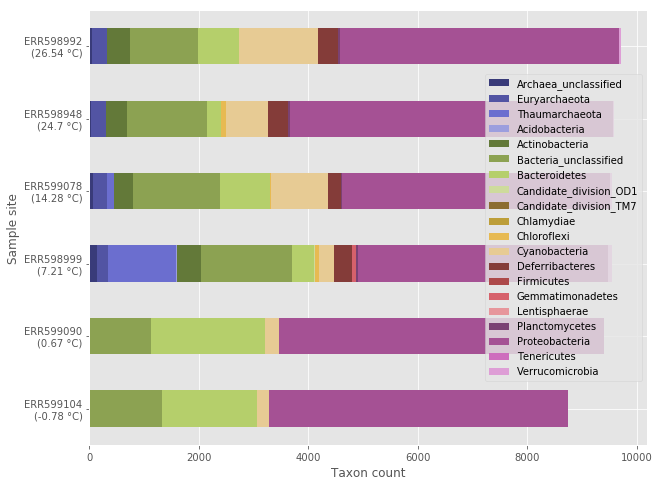

In [14]:
ax = taxon_data_clean.plot(
    kind='barh', stacked=True, x="Label",
    figsize=(10,8), colormap="tab20b", grid=True)

ax.set_xlabel("Taxon count")
ax.set_ylabel("Sample site")

In [15]:
fig = ax.get_figure()
fig.savefig('test.png')